In [111]:
#Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt




In [112]:
#Reading all data files
age_df=pd.read_excel('Data/age_data.xlsx')

dev_data=pd.read_csv('Data/gdp_clean.csv')


In [113]:
#Renaming columns for merging
age_df=age_df.rename(columns={"Country or area": "Country"})

#Merging the two dataframes
merged_df=pd.merge(age_df,dev_data, on="Country")
age_clean_df=merged_df.copy()

In [114]:
age_clean_df

,Country,ISO code,Survey start year,Survey end year,Marital status,Age group,Age group standardised,Indicator,Data value,Data source,...,Unnamed: 11,Unnamed: 12,Notes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Year,Value,Development
0,Afghanistan,4.0,1972.0,1974.0,Ever-married,[15-24],[Other],Any method,1,National survey,...,Afghanistan 1972-1974 National Demographic and...,1972-1974 NDFGS,..,..,..,..,..,2012,1958.447627,Developing
1,Afghanistan,4.0,1972.0,1974.0,Ever-married,[15-44],[Total],Any method,1.6,National survey,...,Afghanistan 1972-1974 National Demographic and...,1972-1974 NDFGS,..,..,..,..,..,2012,1958.447627,Developing
2,Afghanistan,4.0,1972.0,1974.0,Ever-married,[15-24],[Other],Modern method,1,National survey,...,Afghanistan 1972-1974 National Demographic and...,1972-1974 NDFGS,..,..,..,..,..,2012,1958.447627,Developing
3,Afghanistan,4.0,1972.0,1974.0,Ever-married,[15-44],[Total],Modern method,1.6,National survey,...,Afghanistan 1972-1974 National Demographic and...,1972-1974 NDFGS,..,..,..,..,..,2012,1958.447627,Developing
4,Afghanistan,4.0,2000.0,2000.0,Married/In-union,[12-19],[15-19],Any method,2.5,National survey,...,Afghanistan 2000 Multiple Indicator Cluster Su...,2000 MICS (East),"Data pertain to Nangarhar, Konar and Laghman, ...",..,..,..,..,2012,1958.447627,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62386,Zimbabwe,716.0,2015.0,2015.0,Unmarried/Not-in-union,[30-34],[30-34],Demand satisfied by modern,88.666569,DHS microdata,...,Zimbabwe 2015 Demographic and Health Survey,2015 DHS,..,..,..,..,..,2012,2349.028207,Developing
62387,Zimbabwe,716.0,2015.0,2015.0,Unmarried/Not-in-union,[35-39],[35-39],Demand satisfied by modern,85.812035,DHS microdata,...,Zimbabwe 2015 Demographic and Health Survey,2015 DHS,..,..,..,..,..,2012,2349.028207,Developing
62388,Zimbabwe,716.0,2015.0,2015.0,Unmarried/Not-in-union,[40-44],[40-44],Demand satisfied by modern,95.426089,DHS microdata,...,Zimbabwe 2015 Demographic and Health Survey,2015 DHS,..,..,..,..,..,2012,2349.028207,Developing
62389,Zimbabwe,716.0,2015.0,2015.0,Unmarried/Not-in-union,[45-49],[45-49],Demand satisfied by modern,83.361855,DHS microdata,...,Zimbabwe 2015 Demographic and Health Survey,2015 DHS,..,..,..,..,..,2012,2349.028207,Developing


In [115]:
#Deleting all redundant columns
age_clean_df = age_clean_df.drop(columns=["ISO code", "Notes","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17","Value", "Indicator", "Age group standardised"])

In [116]:
#Formating the start and end year into integer
age_clean_df=age_clean_df.astype({"Survey start year":int})
age_clean_df=age_clean_df.astype({"Survey end year":int})

#Keeping the data for start survery year greater than 2012 as we want our data to be up to date.
age_clean_df=age_clean_df.loc[age_clean_df["Survey start year"]>=2012, :]
age_clean_df=age_clean_df.dropna(subset=["Age group"])
age_clean_df["Age group"].unique()

array(['[12-19]', '[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]',
       '[45-49]', '[12-49]', '[15-19]', '[15-49]', '[18-19]', '[18-44]',
       '[18-49]', '[16-49]', '[15-54]', '[44-49]', '[10-14]', '[25+]',
       '[12-14]', '[16-19]', '[16-44]', '[10-49]', '[18-24]', '[20-44]',
       '[20-49]', '[30-39]', '[20-29]', '[15-24]', '[15-44]'],
      dtype=object)

In [117]:
#Removing square brackets from the data
age_clean_df["Age group"] = age_clean_df["Age group"].str.replace(r'[\[\]]', '', regex=True)
age_clean_df["Age group"].unique()

array(['12-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '12-49', '15-19', '15-49', '18-19', '18-44', '18-49', '16-49',
       '15-54', '44-49', '10-14', '25+', '12-14', '16-19', '16-44',
       '10-49', '18-24', '20-44', '20-49', '30-39', '20-29', '15-24',
       '15-44'], dtype=object)

In [118]:
#   Removing the row with 25+ in the data
age_clean_df=age_clean_df.loc[age_clean_df["Age group"]!="25+",:]
age_clean_df["Age group"].unique()


array(['12-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '12-49', '15-19', '15-49', '18-19', '18-44', '18-49', '16-49',
       '15-54', '44-49', '10-14', '12-14', '16-19', '16-44', '10-49',
       '18-24', '20-44', '20-49', '30-39', '20-29', '15-24', '15-44'],
      dtype=object)

In [119]:
#Cleaning the Data value column
age_clean_df["Data value"].unique()


array([2.7, 7.8, 12.7, ..., 95.4260886749426, 83.3618545323479,
       82.1919335590919], dtype=object)

In [120]:
#Cleaning the Data value column
age_clean_df=age_clean_df.loc[age_clean_df["Data value"]!="...",:]

WE WILL ASSIGN COMMON AGE GROUP FOR ALL OUR DATA BY CALCULATING AVERAGE VALUE OF OUR GIVEN AGE RANGE AND THEN BINNING IN INTO GROUPS:["10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50"]

THIS STEP IS CRUCIAL TO KNOW IF WE HAVE DATA FOR ALL NEW AGE RANGE CREATED ABOVE AND DROPPING ANY DUPLICATES WE HAVE FOR SAME AGE RANGE AND SOME COUNTRY.

In [121]:
#Finding the middle value of the group range
averages=[]

for i in age_clean_df["Age group"]:
    if "-" in i:
        values=i.split("-")
        low=float(values[0])
        high=float(values[1])
        average=(low+high)/2  
        averages.append(average)
    else:
        averages.append(i)
    
age_clean_df["Average of age group"]=averages

age_clean_df
        

,Country,Survey start year,Survey end year,Marital status,Age group,Data value,Data source,Year,Development,Average of age group
107,Afghanistan,2012,2012,Married/In-union,12-19,2.7,National survey,2012,Developing,15.5
108,Afghanistan,2012,2012,Married/In-union,20-24,7.8,National survey,2012,Developing,22.0
109,Afghanistan,2012,2012,Married/In-union,25-29,12.7,National survey,2012,Developing,27.0
110,Afghanistan,2012,2012,Married/In-union,30-34,15.3,National survey,2012,Developing,32.0
111,Afghanistan,2012,2012,Married/In-union,35-39,20.9,National survey,2012,Developing,37.0
...,...,...,...,...,...,...,...,...,...,...
62386,Zimbabwe,2015,2015,Unmarried/Not-in-union,30-34,88.666569,DHS microdata,2012,Developing,32.0
62387,Zimbabwe,2015,2015,Unmarried/Not-in-union,35-39,85.812035,DHS microdata,2012,Developing,37.0
62388,Zimbabwe,2015,2015,Unmarried/Not-in-union,40-44,95.426089,DHS microdata,2012,Developing,42.0
62389,Zimbabwe,2015,2015,Unmarried/Not-in-union,45-49,83.361855,DHS microdata,2012,Developing,47.0


In [122]:
#Binning
bins=[10,15,20,25,30,35,40,45,50]
group_names=["10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50"]
             
age_clean_df["Age Range"]=pd.cut(age_clean_df["Average of age group"], bins, labels=group_names, include_lowest=True)            
age_clean_df


,Country,Survey start year,Survey end year,Marital status,Age group,Data value,Data source,Year,Development,Average of age group,Age Range
107,Afghanistan,2012,2012,Married/In-union,12-19,2.7,National survey,2012,Developing,15.5,15-20
108,Afghanistan,2012,2012,Married/In-union,20-24,7.8,National survey,2012,Developing,22.0,20-25
109,Afghanistan,2012,2012,Married/In-union,25-29,12.7,National survey,2012,Developing,27.0,25-30
110,Afghanistan,2012,2012,Married/In-union,30-34,15.3,National survey,2012,Developing,32.0,30-35
111,Afghanistan,2012,2012,Married/In-union,35-39,20.9,National survey,2012,Developing,37.0,35-40
...,...,...,...,...,...,...,...,...,...,...,...
62386,Zimbabwe,2015,2015,Unmarried/Not-in-union,30-34,88.666569,DHS microdata,2012,Developing,32.0,30-35
62387,Zimbabwe,2015,2015,Unmarried/Not-in-union,35-39,85.812035,DHS microdata,2012,Developing,37.0,35-40
62388,Zimbabwe,2015,2015,Unmarried/Not-in-union,40-44,95.426089,DHS microdata,2012,Developing,42.0,40-45
62389,Zimbabwe,2015,2015,Unmarried/Not-in-union,45-49,83.361855,DHS microdata,2012,Developing,47.0,45-50


In [123]:
#Sorting the dataframe by country first and then by year
age_clean_df = age_clean_df.sort_values(by=['Country', 'Survey start year'], ascending=[True, False])
age_clean_df = age_clean_df.drop_duplicates(subset=['Country', 'Age Range'], keep='first')
age_clean_df

,Country,Survey start year,Survey end year,Marital status,Age group,Data value,Data source,Year,Development,Average of age group,Age Range
156,Afghanistan,2018,2018,Ever-married,12-49,18.9,National survey,2012,Developing,30.5,30-35
115,Afghanistan,2015,2016,Married/In-union,15-19,7.755603,DHS microdata,2012,Developing,17.0,15-20
116,Afghanistan,2015,2016,Married/In-union,20-24,17.631357,DHS microdata,2012,Developing,22.0,20-25
117,Afghanistan,2015,2016,Married/In-union,25-29,20.932466,DHS microdata,2012,Developing,27.0,25-30
119,Afghanistan,2015,2016,Married/In-union,35-39,29.015637,DHS microdata,2012,Developing,37.0,35-40
...,...,...,...,...,...,...,...,...,...,...,...
62273,Zimbabwe,2015,2015,All women,25-29,62.640691,DHS microdata,2012,Developing,27.0,25-30
62274,Zimbabwe,2015,2015,All women,30-34,66.849508,DHS microdata,2012,Developing,32.0,30-35
62275,Zimbabwe,2015,2015,All women,35-39,65.432411,DHS microdata,2012,Developing,37.0,35-40
62276,Zimbabwe,2015,2015,All women,40-44,57.363858,DHS microdata,2012,Developing,42.0,40-45


In [124]:
age_clean_df = age_clean_df.sort_values(by=['Country', 'Age Range'], ascending=[True, True])
age_clean_df=age_clean_df.astype({"Data value": float})


In [125]:
#Grouping the data by age range, development category and calculating the average of the data value
bar_chart_df=age_clean_df[["Age Range", "Development", "Data value"]]
groupby_bar=bar_chart_df.groupby(["Age Range", "Development"])["Data value"].mean().unstack()
groupby_bar

C:\Users\vidus\AppData\Local\Temp\ipykernel_26340\3613259760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_bar=bar_chart_df.groupby(["Age Range", "Development"])["Data value"].mean().unstack()


Development,Developed,Developing
Age Range,,
10-15,NaN,25.200000
15-20,34.041460,13.748460
20-25,50.580391,30.965063
25-30,54.799701,39.802006
30-35,56.389899,41.363970
35-40,56.595000,44.250915
40-45,54.961269,40.304037
45-50,43.335749,30.553425


Since we have a NaN value, we will drop the range 10-15 in our analysis

In [129]:
# Dropping the rows containing data on the age range 10-15
age_clean_df=age_clean_df.loc[age_clean_df["Age Range"]!="10-15",:]

#Removing Category 10-15 
age_clean_df["Age Range"] = age_clean_df["Age Range"].cat.remove_unused_categories()

In [131]:
#Regrouping the data by age range, development category and calculating the average of the data value
new_bar_chart_df=age_clean_df[["Age Range", "Development", "Data value"]]
new_groupby_bar=new_bar_chart_df.groupby(["Age Range", "Development"])["Data value"].mean().unstack()
new_groupby_bar

C:\Users\vidus\AppData\Local\Temp\ipykernel_26340\389690523.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_groupby_bar=new_bar_chart_df.groupby(["Age Range", "Development"])["Data value"].mean().unstack()


Development,Developed,Developing
Age Range,,
15-20,34.041460,13.748460
20-25,50.580391,30.965063
25-30,54.799701,39.802006
30-35,56.389899,41.363970
35-40,56.595000,44.250915
40-45,54.961269,40.304037
45-50,43.335749,30.553425


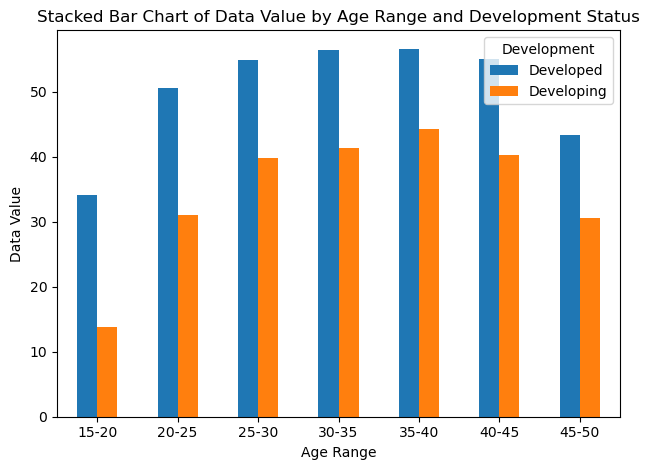

In [138]:


# Ploting the unstacked bar chart
new_groupby_bar.plot(kind='bar', stacked=False)

# Adding labels
plt.title('Stacked Bar Chart of Data Value by Age Range and Development Status')
plt.xlabel('Age Range')
plt.ylabel('Data Value')
plt.xticks(rotation=0)
plt.legend(title='Development', loc="best")

plt.tight_layout()
plt.show()

C:\Users\vidus\AppData\Local\Temp\ipykernel_26340\1973792369.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(developed_scatter["Average of age group"], developed_scatter["Data value"], marker='x', label="Developed", alpha=0.75, facecolor="blue", edgecolor="black" )


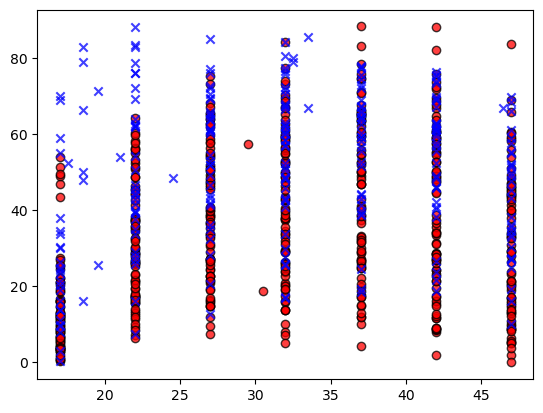

In [146]:
#Adding a scatter plot
developing_scatter = age_clean_df.loc[age_clean_df["Development"] == "Developing",:]

developed_scatter = age_clean_df.loc[age_clean_df["Development"] == "Developed",:]


plt.scatter(developing_scatter["Average of age group"], developing_scatter["Data value"], marker='o', label="Developing", alpha=0.75, facecolor="red", edgecolor="black" )
plt.scatter(developed_scatter["Average of age group"], developed_scatter["Data value"], marker='x', label="Developed", alpha=0.75, facecolor="blue", edgecolor="black" )


plt.show()

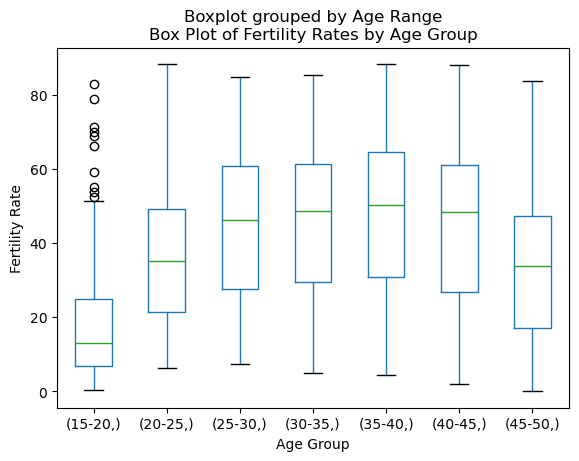

In [151]:
#Using box plot since data is very closely clustered

age_clean_df.boxplot(column="Data value", by=["Age Range"], grid=False)
plt.title('Box Plot of Fertility Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fertility Rate')

plt.show()